### **Import Packages**

In [1]:
import numpy as np
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [2]:
# Set up the path for your dataset
dataset_path = 'C:/Users/Ewan Lee/OneDrive/Desktop/NJIT Stuff/F24/CS 375 HON/Project/CS375H01_project_BCD/Dataset'
healthy_path = os.path.join(dataset_path, 'healthy')
tumor_path = os.path.join(dataset_path, 'tumor')

# Constants
img_size = 128
input_shape = (img_size, img_size, 3)

# Helper functions for loading and preprocessing the dataset
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), target_size=(img_size, img_size))
        if img is not None:
            images.append(tf.keras.preprocessing.image.img_to_array(img))
    return images

# Load images for healthy and tumor categories
healthy_images = load_images_from_folder(healthy_path)
tumor_images = load_images_from_folder(tumor_path)

### **Reshape Data**

In [3]:
# Labels for the dataset
healthy_labels = [0] * len(healthy_images)
tumor_labels = [1] * len(tumor_images)

# Combine and reshape
images = np.array(healthy_images + tumor_images)
labels = np.array(healthy_labels + tumor_labels)

# Normalize the images
images = images / 255.0

# Split the training and testing data, images being the x and labels being the y
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape the data
X_train = np.mean(X_train, axis=-1, keepdims=True)
X_test = np.mean(X_test, axis=-1, keepdims=True)

### **Create, Compile, Train Model**

In [4]:
# Defining the model and adding Convolution, Pooling, Connected, and Output layer
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))

# Compiling the model with loss function, optimizer, and metric for function
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fitting the model and evaluating it to the data
trained_model = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.5742 - loss: 1.3201 - val_accuracy: 0.8125 - val_loss: 0.3863
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.8466 - loss: 0.3665 - val_accuracy: 0.9125 - val_loss: 0.2707
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.8935 - loss: 0.2374 - val_accuracy: 0.9125 - val_loss: 0.2098
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9476 - loss: 0.1297 - val_accuracy: 0.9563 - val_loss: 0.1488
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9842 - loss: 0.0787 - val_accuracy: 0.9563 - val_loss: 0.1227
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9873 - loss: 0.0556 - val_accuracy: 0.9563 - val_loss: 0.1120
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.9975 - loss: 0.0364 - val_accuracy: 0.9625 - val_loss: 0.1319
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9968 - loss: 0.0212 - val_accuracy: 0.

### **Display Loss and Accuracy**

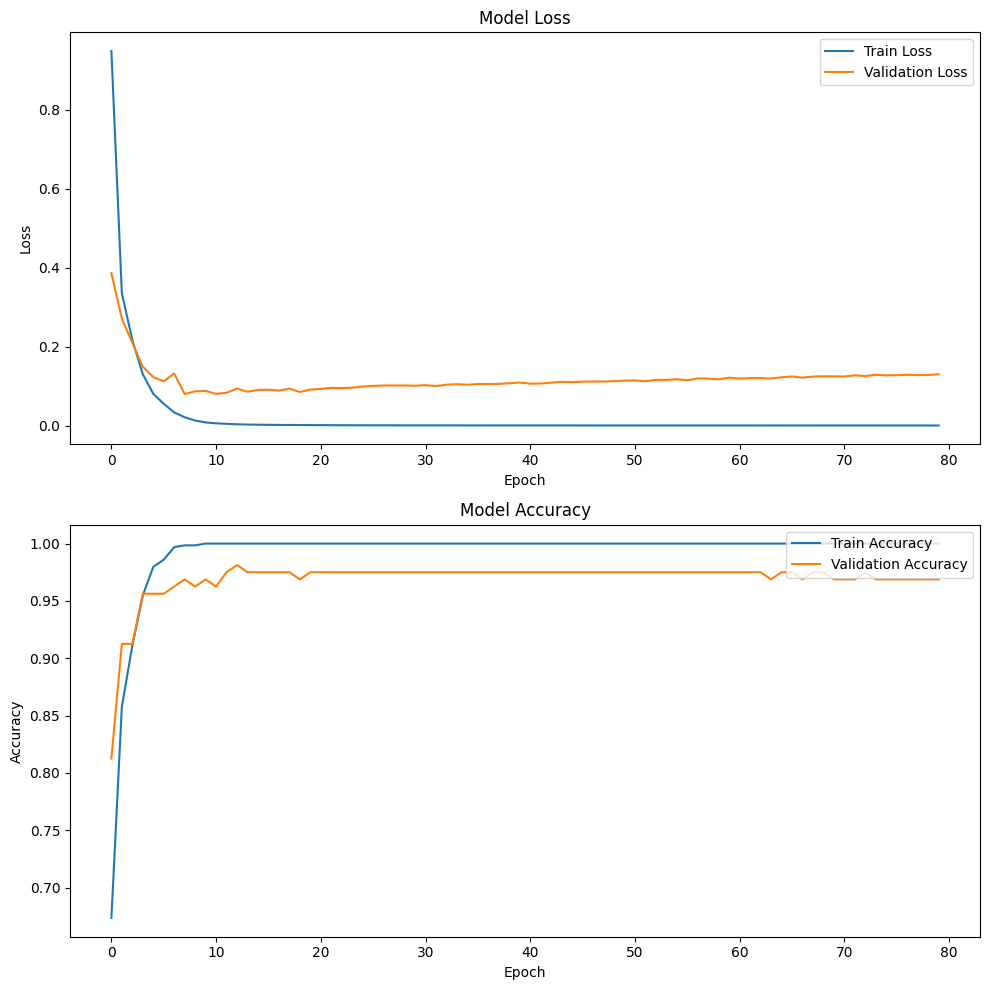

In [5]:
# Display the loss and the accuracy of the model
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
# Plot the training and validation loss in the first subplot
axes[0].plot(trained_model.history['loss'], label='Train Loss')
axes[0].plot(trained_model.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='upper right')

# Plot the training and validation accuracy in the second subplot
axes[1].plot(trained_model.history['accuracy'], label='Train Accuracy')
axes[1].plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='upper right')

# Adjust layout for better appearance
plt.tight_layout()

# Show the combined plot
plt.show()

### **Display Accuracy and F1 Score Metrics**

In [6]:
# Making predictions and storing the results, comparing percentages            
y_pred=np.round(model.predict(X_test))
# Store the results of the predictions as labels, also track true positives where having a tumor(0) is positive and healthy(1) is negative
result=[]
y_pred1D=[]
for i in range(len(y_pred)):
    if (y_pred[i][0]==0):
        y_pred1D.append(1)
        result.append("Tumor")
    else:
        y_pred1D.append(0)
        result.append("Healthy")
correct=0
falsehealthy=[]
falsetumor=[]
for i in range(len(result)):
    if (result[i]=="Healthy" and y_test[i]==0) or (result[i]=="Tumor" and y_test[i]==1):
        correct+=1
    else:
        if(result[i]=="Healthy" and y_test[i]==1):
            falsehealthy.append(i)
        if(result[i]=="Tumor" and y_test[i]==0):
            falsetumor.append(i) 
percent=correct/len(result) * 100  
print(f"Percent of correct predictions: {percent}%")

# F1 Score evaluation
f1 = f1_score(y_test, y_pred1D, average=None)
print(f"F1 Score: {f1}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Percent of correct predictions: 96.875%
F1 Score: [0.9689441  0.96855346]


### **Display Recall Metric**

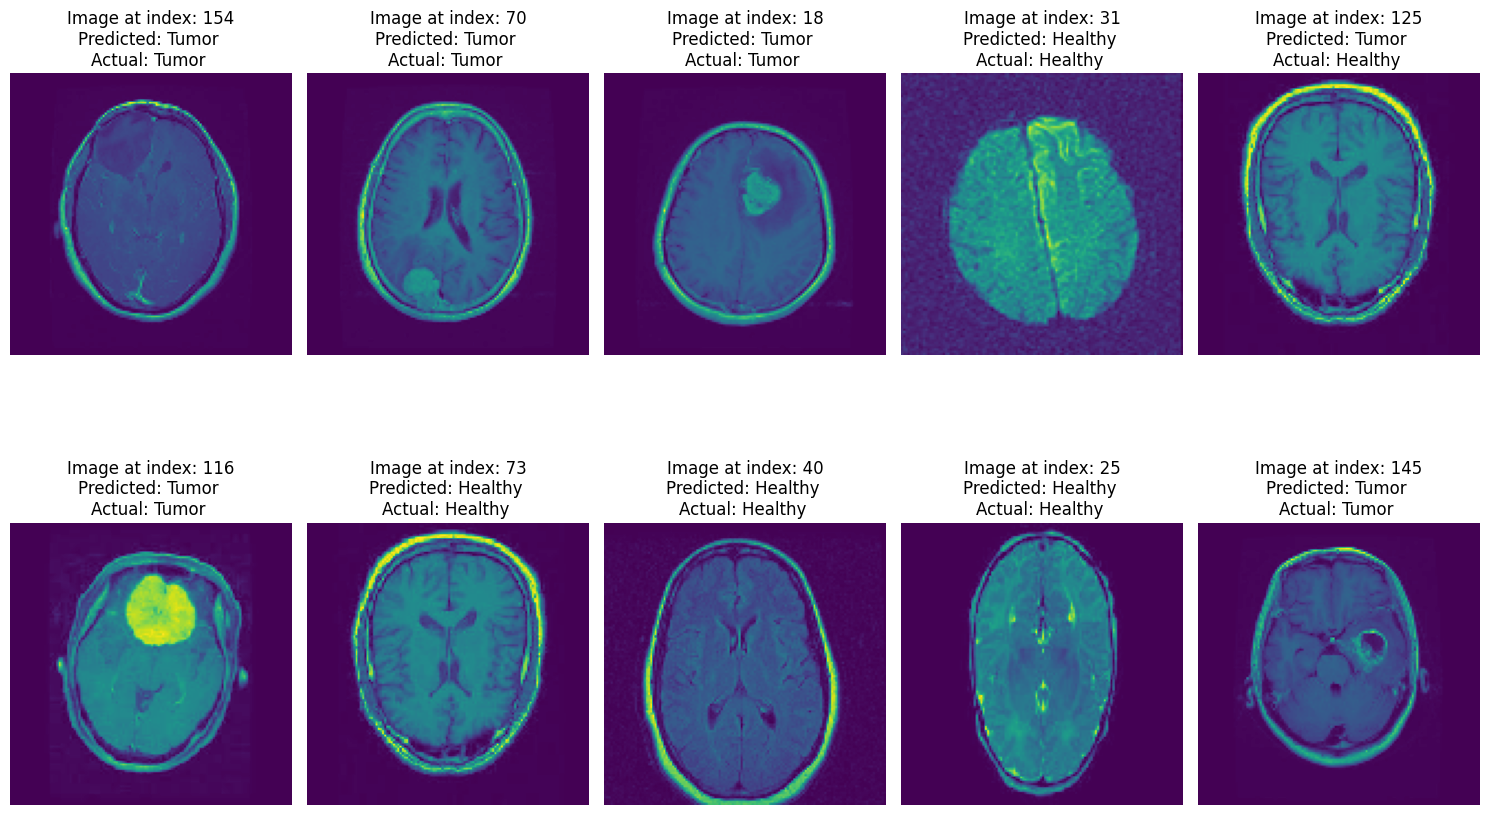

In [28]:
# Prints 10 random images to demonstrate prediction vs actual label
idx = random.randint(0, len(X_test))
# Show sample images of both healthy and tumor
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 10 // 2, i + 1)
    plt.imshow(X_test[idx])  # Use matplotlib to display the image
    label = "Healthy" if y_test[idx]==0 else "Tumor"
    plt.title(f"Image at index: {idx}\nPredicted: {result[idx]} \nActual: {label} ")  # Set a title for the image
    plt.axis('off')
    idx = random.randint(0, len(X_test))
plt.tight_layout()
plt.show()

### **"Healthy Brains" with Tumors**

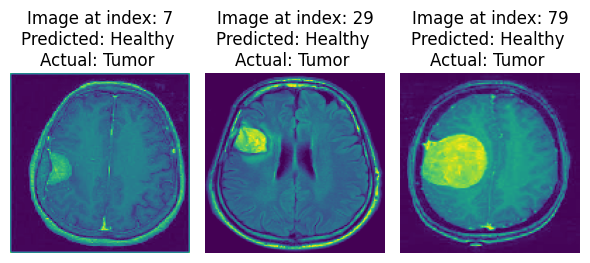

In [29]:
# Tumor brains classified as Healthy
plt.figure(figsize=(len(falsehealthy)*2, len(falsehealthy)))
for j in range(len(falsehealthy)):
    plt.subplot(1, len(falsehealthy), j + 1)
    plt.imshow(X_test[falsehealthy[j]])  # Use matplotlib to display the image
    label = "Healthy" if y_test[falsehealthy[j]]==0 else "Tumor"
    plt.title(f"Image at index: {falsehealthy[j]}\nPredicted: {result[falsehealthy[j]]} \nActual: {label} ")  # Set a title for the image
    plt.axis('off')
plt.tight_layout()
plt.show()

### **"Tumor Brains" without Tumors**

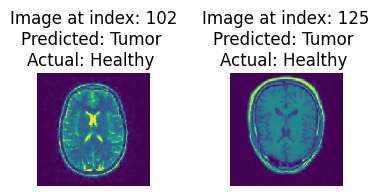

In [25]:
# Healthy brains classified as Tumors
plt.figure(figsize=(len(falsetumor)*2, len(falsetumor)))
for k in range(len(falsetumor)):
    plt.subplot(1, len(falsetumor), k + 1)
    plt.imshow(X_test[falsetumor[k]])  # Use matplotlib to display the image
    label = "Healthy" if y_test[falsetumor[k]]==0 else "Tumor"
    plt.title(f"Image at index: {falsetumor[k]}\nPredicted: {result[falsetumor[k]]} \nActual: {label} ")  # Set a title for the image
    plt.axis('off')
plt.tight_layout()
plt.show()